## Import libraries

In [1]:
import wooldridge as woo
import pandas as pd
import numpy as np
import statsmodels.api as sm

## Load dataset

In [2]:
df = woo.data("meap93")
df.head()

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
0,1.4,1862,112.599998,5765,37498.0,7420,2.9,89.199997,56.400002,67.900002,44918.0,10.712594,8.659560,7.529407,4.723842,0.197877,10.532043
1,2.3,11355,101.199997,6601,48722.0,10370,1.3,91.400002,42.700001,65.300003,59092.0,10.986851,8.794976,9.337414,4.617099,0.212840,10.793886
2,2.7,7685,114.000000,6834,44541.0,7313,3.5,91.400002,43.799999,54.299999,51854.0,10.856188,8.829665,8.947025,4.736198,0.164186,10.704165
3,3.4,1148,85.400002,3586,31566.0,5989,3.6,86.599998,25.299999,60.000000,37555.0,10.533562,8.184793,7.045776,4.447346,0.189729,10.359836
4,3.4,1572,96.099998,3847,29781.0,5545,0.0,100.000000,15.300000,65.800003,35326.0,10.472375,8.255049,7.360104,4.565389,0.186193,10.301626


## (i) Effect of each additional dollar: constant or decreasing?

The effect of a percentage increase in spending is approximately constant, but the absolute effect decreases as spending increases.

## (ii) Interpretation of 𝛽1/10 in a log-linear model

β1/10 represents the approximate increase in the math passing rate (in percentage points) associated with a 10% increase in expenditure per student.

## (iii) Estimate the log-linear model

In [3]:
# Log-linear model - assumes diminishing returns
df['log_expend'] = np.log(df['expend'])
X_log = sm.add_constant(df['log_expend'])
log_model = sm.OLS(y, X_log).fit()
print(log_model.summary())

NameError: name 'y' is not defined

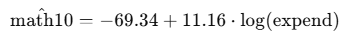

Sample size: n=408

R-squared: R2=0.03

## (iv) Magnitude of the estimated effect

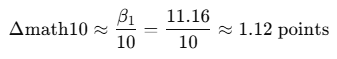

Interpretation: increasing expenditure per student by 10% is associated with an increase of ~1.12 percentage points in the math passing rate.

## (v) Concern about predicted values > 100

Most observed math10 values are well below 100%.

The regression predicts reasonable fitted values within the observed range of expenditures.

Extrapolation beyond the data range could produce values > 100%, but we are mostly interested in effects within the observed data, where this issue does not occur.